# Центральная предельная теорема. 

Как применить законы статистики к данным ? 
Сколько элементов сумм использовано в коде?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

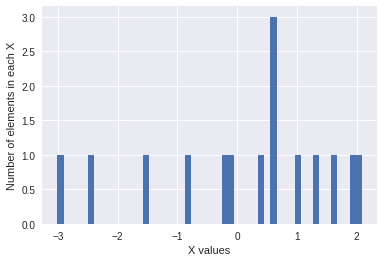

In [0]:
# Задание
number_of_sums = ? - найти количество
number_of_randoms = 10
X1 = np.zeros((number_of_sums, 1))
for i in range(number_of_sums):
  X1[i,0] = np.sum(np.random.rand(number_of_randoms,1)) - np.sum(np.random.rand(number_of_randoms,1))
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

Количество элементов = 15, при этом 3 из них имеют значение ~ 0.6.

Попробуем запуститить этот код с таким же кол-вом элементов сумм:

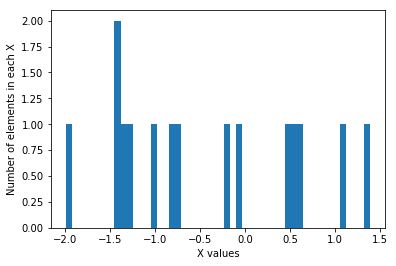

In [145]:
number_of_sums = 15
number_of_randoms = 10
X1 = np.zeros((number_of_sums, 1))
for i in range(number_of_sums):
  X1[i,0] = np.sum(np.random.rand(number_of_randoms,1)) - np.sum(np.random.rand(number_of_randoms,1))
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

В данном случае получилось 2 элемента со значением ~ -0,25, 3 элемента со значением 1.

# Матрица ковариаций

Чему равна матрица ковариаций для графика?

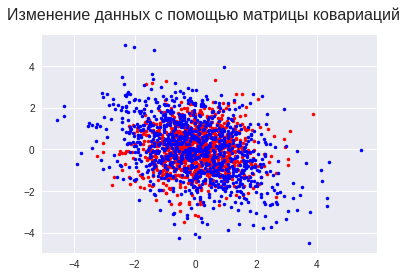

In [0]:
# Задание
import numpy.linalg as la
n = 1000
C = ? # найти!
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16)  
plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')

Виден отрицательный угол наклона измененной выборки на графике. 

Подставим соответствующие значения в матрицу ковариаций и проверим:

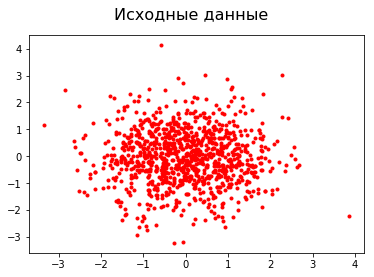

In [146]:
import numpy.linalg as la

n = 1000
C = [[5, -2],[-2, 5]]
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.suptitle('Исходные данные', fontsize=16)  
plt.plot(X[:,0], X[:,1], 'r.')

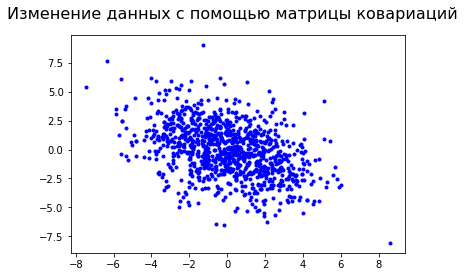

In [147]:
plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16)  
plt.plot(Y[0,:], Y[1,:], 'b.')

-------------------------------------------------------
***замечание преподавателя:***
    In [146]:
import numpy.linalg as la
n = 1000
C = [[5, -2],[-2, 5]] - на самом деле нет, если попробуешь поэкспериментировать с данными и нарисуешь графики совместно, можно заметить, что график не похож на исходный график в ноутбуке домашнего задания. Матрица, соответственно, отличается. Конкретно диагональные элементы должны быть меньше у матрицы.

***исправление:***
да, действительно, ошиблась. Разброс данных в измененной выборке получился намного больше - (-6, 6) с выбросами до -8  и 9, тогда как в задании разброс по x был всего (-4, 4).
Исправляю диагональные элементы, чтобы уменьшить разброс:

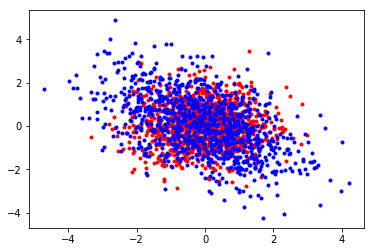

In [18]:
import numpy.linalg as la

n = 1000
C = [[2, -1.0],[-1.0, 2]]
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)
 
plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')

# Разброс данных 2 способами: теоритически и практически

Построить преобразование с помощью вычисленной выше матрицей

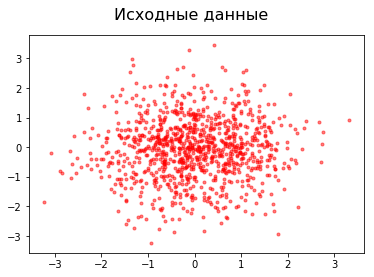

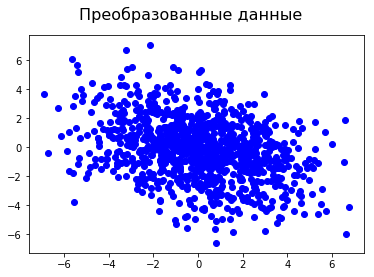

In [57]:
mu, sigma = 0, 1 # mean and standard deviation
# x = np.random.normal(mu, sigma, 100)
x = np.matrix(np.random.normal(0, 1, size=(1000, 2)))
c = [[5, -2],[-2, 5]]
a = np.linalg.cholesky(c)
y = x * a
plt.suptitle('Исходные данные', fontsize=16) 
plt.plot(x[:, 0], x[:, 1], linestyle='None', color="red", marker=".", alpha=0.5) 
plt.show()
plt.suptitle('Преобразованные данные', fontsize=16) 
plt.plot(y[:, 0], y[:, 1], linestyle='None', color="blue", marker="o", alpha=1)
plt.show()

Посчитать угол наклона полученного распределения (визуально) в радианах и посчитать разброс данных теоритически и практически

In [148]:
import math

theta = 2.2825                          #примерно 130 градусов      
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp = y*u
var_empirical = np.var(yp)
var_theoretical = np.transpose(u)*c*u
print('генерация данных: ', var_empirical)
print('теоритический подсчет: ', var_theoretical)

генерация данных:  6.961893812862711
теоритический подсчет:  [[6.97831579]]


При  большом количестве данных эти показатели должны быть равны. Достаточно ли мы данных сгенерировали?


Ответ - показатели близки друг к другу, различаются на 0,016. Данных достаточно.

Посчитать как меняется вариация в зависимости от выбора собственного вектора

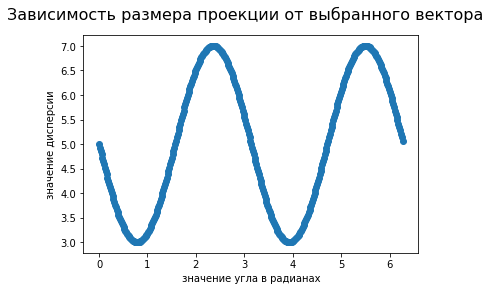

In [149]:
degrees360 = [2*math.pi/360*i for i in range(360)]
variances = []
for i in degrees360:
    theta = i
    u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
    yp = y*u
    var_empirical = np.var(yp)
    var_theoretical = np.transpose(u)*c*u
    variances.append(var_theoretical)

plt.suptitle('Зависимость размера проекции от выбранного вектора', fontsize=16)    
plt.xlabel('значение угла в радианах')
plt.ylabel('значение дисперсии')
plt.scatter(degrees360, variances)
plt.show()

Максимальный разброс при угле ~ 2.3 радиан, что соответсвует полученным ранее значениям

# Работа с данными данные

Загрузить таблицу. 

In [30]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Построить корелляцию для всех типов авокадо (их там три). Построить графики histograms и плотность распределения (смотрим примеры из лекций).

In [31]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', '4225', '4770']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1         2
0 -0.999909 -0.994680 -0.999962
1 -0.999941 -0.995639 -0.999954
2 -0.999930 -0.989336 -0.999898
3 -0.999900 -0.992968 -0.999943
4 -0.999917 -0.995717 -0.999940


In [32]:
df_norm.corr()     # Матрица попарных корреляций между сортами

,0,1,2
0,1.000000,0.926110,0.833389
1,0.926110,1.000000,0.887855
2,0.833389,0.887855,1.000000


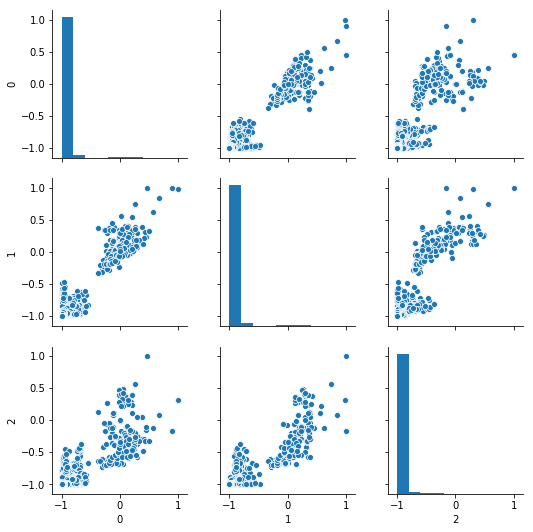

In [33]:
import seaborn as sns
sns.pairplot(df_norm)                  # попарная визуализация

Посчитать матрицу ковариаций. Как из нее получить собственные вектора и собственные числа?

In [37]:
# посчитать ковариацию переменных (разброс относительно друг друга)
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# матрица ковариаций
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

X = np.vstack((df_norm[0], df_norm[1]))

# считаем матрицу ковариаций для вектора X
cov_mat(X.T) # (or with np.cov(X.T))

array([[1.36719418e-05, 1.12478035e-05],
       [1.12478035e-05, 9.25348315e-06]])

# Поиск собственного вектора

2.2925424937466838e-05 [0.77224731 0.63532204]


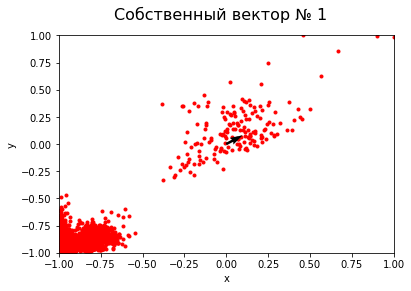

0.0 [-0.63532204  0.77224731]


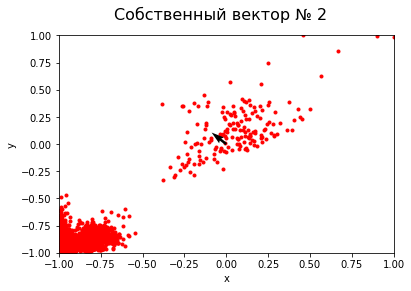

In [35]:
import numpy.linalg as la
n=1000
Cb = cov_mat(X.T)

w,v = la.eig(Cb)

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(X[0,:], X[1,:], 'r.', zorder=1)
    plt.axis([-1,1,-1,1])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', zorder=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

***Замечание:***
    for i in range(len(w)):
plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)
plt.plot(X[0,:], X[1,:], ‘r.’, zorder=1)
plt.axis([-1,1,-1,1])
print(w[i], v[:,i])
plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = ‘xy’, zorder=2) - хочется здесь увидеть длину w (собственное значение для размера разброса)

***Исправление:***
Очень сложно понять, что имеется в виду, так как в лекции это в явном виде я не услышала. Из того, что было в лекции на похожем пункте, был доп. атрибут маштабирования scale = (2.5/w[i]). Опять же - почему 2.5 - никак не комментируется.
Если я ставлю 2.5 или же 0.5 - мой вектор превращается в точку.

Потавила просто scale = w[i] (значение его выводится в строке print(w[i], v[:,i])). Получилось примерно такая же уходящая в даль стрелочка, как у вас в лекции. но почему - загадка для меня, так как ни в лекции это непонятно, ни я сама догадаться не смогла.

По моему пониманию, стрелка должна соответствовать по длине разбросу в ее направлении. 


2.2925424937466838e-05 [0.77224731 0.63532204]


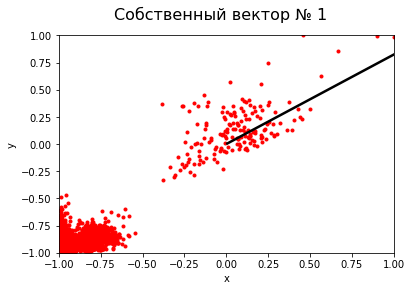

0.0 [-0.63532204  0.77224731]


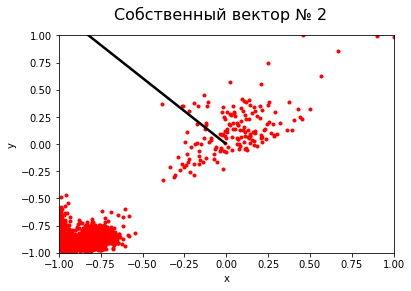

In [56]:
import numpy.linalg as la
n=1000
Cb = cov_mat(X.T)

w,v = la.eig(Cb)

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(X[0,:], X[1,:], 'r.', zorder=1)
    plt.axis([-1,1,-1,1])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', scale = (w[i]), zorder=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Линейное преобразование значений (проекция на ось).

На какую прямую проецируем?

In [26]:
#задание

Xc = np.array([[2,1],[3,2],[3,3],[2.5,3],[2.8,2.3],[3.2,2.5]])
 # проецирование на какую прямую
Xp = np.dot(Xc,P)

plt.plot(Xc[:,0], Xc[:,1], 'ro', label="Исходные данные")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Спроецированные данные")
#plt.axis([0,4,0,4])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

<img src = "2.png"/>

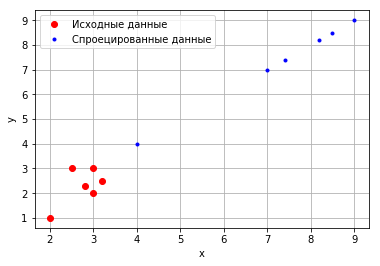

In [23]:
Xc = np.array([[2,1],[3,2],[3,3],[2.5,3],[2.8,2.3],[3.2,2.5]])
P = np.array([[1, 1], [2, 2]])                             # проецирование на прямую под 45 градусов к началу координат
Xp = np.dot(Xc,P)

plt.plot(Xc[:,0], Xc[:,1], 'ro', label="Исходные данные")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Спроецированные данные")
#plt.axis([0,4,0,4])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

***Замечание:***
    In [170]:
Xc = np.array([[2,1],[3,2],[3,3],[2.5,3],[2.8,2.3],[3.2,2.5]])
P = np.array([[1, 1], [2, 2]]) - на самом деле, P здесь задается как прямая ax+b=y, P=[a,b], где a - это коэффициент наклона прямой. По графику полученному видно, что он не совпадает с графиком домашнего ноутбука, поэтому надо исправить.

***исправление:***


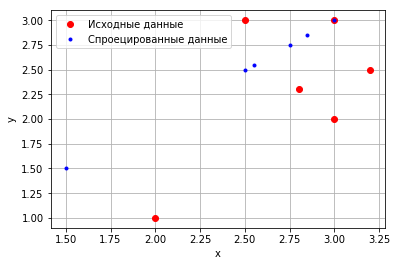

In [27]:
Xc = np.array([[2,1],[3,2],[3,3],[2.5,3],[2.8,2.3],[3.2,2.5]])
P = np.array([[.5, .5], [.5, .5]])                            
Xp = np.dot(Xc,P)

plt.plot(Xc[:,0], Xc[:,1], 'ro', label="Исходные данные")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Спроецированные данные")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

# Теория вероятностЕЙ!

Напишите код для моделирования 100 подбрасываний игрального кубика. Начертите диаграму histogram. 

In [175]:
import random

n = 100
x = []
for i in range(n):
    x.append(random.randint(1, 6))
x

[5,
 6,
 5,
 6,
 4,
 5,
 2,
 6,
 3,
 5,
 6,
 3,
 5,
 2,
 4,
 2,
 4,
 3,
 6,
 1,
 3,
 5,
 3,
 1,
 6,
 3,
 4,
 4,
 1,
 4,
 3,
 3,
 1,
 1,
 2,
 6,
 1,
 4,
 2,
 1,
 3,
 6,
 2,
 6,
 3,
 1,
 2,
 5,
 3,
 2,
 6,
 4,
 4,
 4,
 4,
 3,
 4,
 5,
 2,
 1,
 1,
 5,
 1,
 5,
 4,
 1,
 5,
 5,
 6,
 2,
 4,
 5,
 2,
 5,
 1,
 3,
 3,
 5,
 1,
 4,
 5,
 3,
 2,
 1,
 4,
 6,
 6,
 1,
 6,
 3,
 5,
 3,
 2,
 5,
 6,
 6,
 6,
 5,
 4,
 3]

(array([16., 13., 18., 17., 19., 17.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

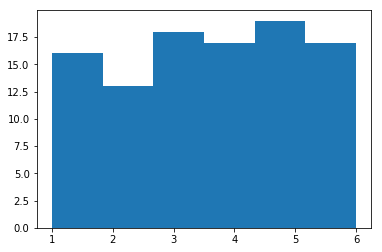

In [177]:
plt.hist(x,6)